<a href="https://colab.research.google.com/github/vasudhab21/ML-LAB/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls -lh "/content/drive/MyDrive/GenomeDetector/data/natural/rickettsiales.zip"

-rw------- 1 root root 124M Jul 26 16:57 /content/drive/MyDrive/GenomeDetector/data/natural/rickettsiales.zip


In [3]:
unzip_path = "/content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales"
zip_file_path = "/content/drive/MyDrive/GenomeDetector/data/natural/rickettsiales.zip"

!unzip -o "{zip_file_path}" -d "{unzip_path}"

Archive:  /content/drive/MyDrive/GenomeDetector/data/natural/rickettsiales.zip
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/README.md  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/GCF_000007025.1/GCF_000007025.1_ASM702v1_genomic.fna  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/GCF_000008045.1/GCF_000008045.1_ASM804v1_genomic.fna  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/GCF_000008385.1/GCF_000008385.1_ASM838v1_genomic.fna  
  inflating: /content/drive/MyDrive/GenomeDetector/data/natural/unzipped_rickettsiales/ncbi_dataset/data/GCF_000012385.1/GCF_000012385.1_ASM1238v1_genomic.fna  
  inflating: /content/drive/MyDrive/GenomeDetec

In [4]:
!pip install biopython

import numpy as np
from itertools import product
from Bio import SeqIO
import glob
import os

# Generates all possible k-mers for a given k
def get_kmer_features(k):
    letters = ['A', 'C', 'G', 'T']
    return sorted([''.join(p) for p in product(letters, repeat=k)])

# Converts a DNA sequence into a vector of k-mer counts
def sequence_to_kmer_counts(sequence, k, kmer_features):
    kmer_counts = {kmer: 0 for kmer in kmer_features}
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k].upper()
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
    return list(kmer_counts.values())


# Loads and processes the data
def load_and_process_genera(natural_path, k):
    X, y = [], []
    kmer_features = get_kmer_features(k)

    search_pattern = os.path.join(natural_path, "ncbi_dataset", "data", "**", "*.fna")
    natural_files = glob.glob(search_pattern, recursive=True)

    if not natural_files:
        print("error")
        return np.array(X), np.array(y)

    for filepath in natural_files:
        for record in SeqIO.parse(filepath, "fasta"):
            organism_name = record.description.lower()
            if len(record.seq) < 1000: continue

            label = -1
            if "rickettsia" in organism_name: label = 0
            elif "wolbachia" in organism_name: label = 1

            if label != -1:
                X.append(sequence_to_kmer_counts(str(record.seq), k, kmer_features))
                y.append(label)

    return np.array(X), np.array(y)

K_VALUE = 4
natural_data_path = '/content/drive/MyDrive/GenomeDetector/data/natural'

print(f"\nProcessing data using k={K_VALUE}...")
X, y = load_and_process_genera(natural_data_path, K_VALUE)

print(f"Data processing complete.")
print(f"Shape of our feature matrix X: {X.shape}")
print(f"Shape of our label vector y: {y.shape}")
print(f"Number of Rickettsia samples (class 0): {np.sum(y == 0)}")
print(f"Number of Wolbachia samples (class 1): {np.sum(y == 1)}")


Processing data using k=4...
Data processing complete.
Shape of our feature matrix X: (274, 256)
Shape of our label vector y: (274,)
Number of Rickettsia samples (class 0): 39
Number of Wolbachia samples (class 1): 235


In [5]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

project_path = '/content/drive/MyDrive/GenomeDetector'
natural_data_path = os.path.join(project_path, 'data', 'natural')

!mkdir -p {natural_data_path}

print(f"Project directory is set to: {project_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project directory is set to: /content/drive/MyDrive/GenomeDetector


In [6]:
# Install the necessary NCBI tools
!pip install ncbi-datasets-pylib > /dev/null

# Define the full path for the zip file
zip_file_path = os.path.join(natural_data_path, 'rickettsiales.zip')

# Dowload natural dataset
print("downloading")
if not os.path.exists(zip_file_path):
    !datasets download genome taxon "Rickettsiales" --reference --assembly-level complete --filename "{zip_file_path}"
else:
    print("zip file already exists")

print("\nUnzipping the dataset... this is essential!")
!unzip -o "{zip_file_path}" -d "{natural_data_path}/"
print("Unzip complete.")

print("\nVerifying contents:")
!ls -lR "{natural_data_path}"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 4.23.0 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.23.0 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.23.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.1

In [7]:
!pip install biopython

import numpy as np
from itertools import product
from Bio import SeqIO
import glob
import os
import matplotlib.pyplot as plt
import numpy as np


# Generates all possible k-mers for a given k
def get_kmer_features(k):
    letters = ['A', 'C', 'G', 'T']
    return sorted([''.join(p) for p in product(letters, repeat=k)])

# Converts a DNA sequence into a vector of k-mer counts
def sequence_to_kmer_counts(sequence, k, kmer_features):
    kmer_counts = {kmer: 0 for kmer in kmer_features}
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k].upper()
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
    return list(kmer_counts.values())

# Loads and preproceses the data
def load_and_process_genera(natural_path, k):
    X, y = [], []
    kmer_features = get_kmer_features(k)

    # This is the search path that finds the unzipped files
    search_pattern = os.path.join(natural_path, "ncbi_dataset", "data", "**", "*.fna")
    natural_files = glob.glob(search_pattern, recursive=True)

    if not natural_files:
        print("error")
        return np.array(X), np.array(y)

    for filepath in natural_files:
        for record in SeqIO.parse(filepath, "fasta"):
            organism_name = record.description.lower()
            if len(record.seq) < 1000: continue

            label = -1
            if "rickettsia" in organism_name: label = 0
            elif "wolbachia" in organism_name: label = 1

            if label != -1:
                X.append(sequence_to_kmer_counts(str(record.seq), k, kmer_features))
                y.append(label)

    return np.array(X), np.array(y)

K_VALUE = 4
natural_data_path = '/content/drive/MyDrive/GenomeDetector/data/natural'

print(f"\nProcessing data using k={K_VALUE}...")
X, y = load_and_process_genera(natural_data_path, K_VALUE)

print(f"Data processing complete.")
print(f"Shape of our feature matrix X: {X.shape}")
print(f"Shape of our label vector y: {y.shape}")
print(f"Number of Rickettsia samples (class 0): {np.sum(y == 0)}")
print(f"Number of Wolbachia samples (class 1): {np.sum(y == 1)}")


Processing data using k=4...
Data processing complete.
Shape of our feature matrix X: (274, 256)
Shape of our label vector y: (274,)
Number of Rickettsia samples (class 0): 39
Number of Wolbachia samples (class 1): 235


A1

In [8]:
# Creating classes
X_rickettsia = X[y == 0]
X_wolbachia = X[y == 1]

# Calculating the class centroid
mean_rickettsia = np.mean(X_rickettsia, axis=0)
mean_wolbachia = np.mean(X_wolbachia, axis=0)
print(f"Mean vector for Rickettsia: {mean_rickettsia}")
print(f"Mean vector for Wolbachia: {mean_wolbachia}")

# Calculating the spread for each class
spread_rickettsia = np.std(X_rickettsia, axis=0)
spread_wolbachia = np.std(X_wolbachia, axis=0)
print(f"Spread for Rickettsia: {spread_rickettsia}")
print(f"Spread for Wolbachia: {spread_wolbachia}")

# Calculating the distance between mean vectors between classes
inter_class_distance = np.linalg.norm(mean_rickettsia - mean_wolbachia)
print(f"Distance between mean vectors: {inter_class_distance}")

Mean vector for Rickettsia: [23763.28205128  7449.33333333 10463.94871795 19379.69230769
  6663.05128205  3860.28205128  2860.84615385  6779.25641026
  9197.58974359  7069.12820513  4351.8974359   6909.48717949
 18405.          7300.          7164.8974359  17190.
  6828.74358974  2153.41025641  3013.56410256  4861.30769231
  4054.28205128  1655.84615385  3121.56410256  4061.07692308
  2421.17948718  1805.17948718  2075.43589744  2245.41025641
  6506.53846154  3076.53846154  3097.46153846  6962.74358974
  9172.23076923  2317.33333333  4156.          7267.30769231
  7235.66666667  2861.53846154  2242.64102564  6845.94871795
  4365.46153846  2365.15384615  1831.48717949  4022.58974359
  7692.66666667  2258.71794872  2883.          6779.1025641
 17131.69230769  5974.53846154  7849.56410256 16326.64102564
  8186.69230769  3927.97435897  3227.79487179  7336.61538462
  7205.66666667  4818.74358974  3815.02564103  4809.51282051
 16771.28205128  6536.02564103  7325.53846154 19536.51282051
  962

A2

/tmp/ipython-input-9-2090454194.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


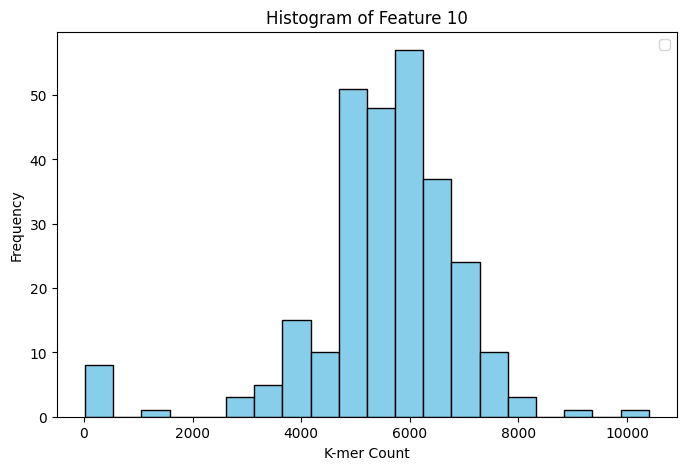

Feature 10 Mean: 5521.2080
Feature 10 Variance: 2022021.8509


In [9]:
# Defining a feature index
feature_index = 10
feature_values = X[:, feature_index]

# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.hist(X[:, feature_index], bins=20, color='skyblue', edgecolor='black')
plt.title(f"Histogram of Feature {feature_index}")
plt.xlabel("K-mer Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Calculating mean and variance
mean_val = np.mean(feature_values)
var_val = np.var(feature_values)

print(f"Feature {feature_index} Mean: {mean_val:.4f}")
print(f"Feature {feature_index} Variance: {var_val:.4f}")

A3

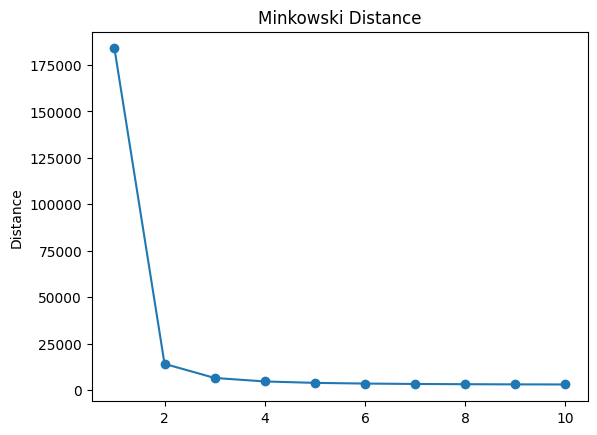

Minkowski Distance: [np.float64(183857.0), np.float64(14052.01028322994), np.float64(6464.74861280206), np.float64(4578.796379648189), np.float64(3820.178381919219), np.float64(3440.7268298663953), np.float64(3225.9763533172677), np.float64(3094.050921338785), np.float64(3007.8953023618164), np.float64(2948.8006439833493)]


In [10]:
# Selecting two feature vectors
vec1 = X[0]
vec2 = X[1]

# Calculate Minkowski distances for r from 1 to 10
r_values = range(1, 11)
distances = []

for r in r_values:
    dist = np.linalg.norm(vec1 - vec2, ord=r)
    distances.append(dist)

# Plotting the distances
plt.plot(r_values, distances, marker='o')
plt.title("Minkowski Distance")
plt.ylabel("Distance")
plt.show()
print("Minkowski Distance:", distances)

A4

In [11]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 191
Testing samples: 83


A5

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Training the classifier
knn.fit(X_train, y_train)

print("Classifier trained successfully")

Classifier trained successfully


A6

In [13]:
# Testing the accuracy of the model
knn.score(X_test, y_test)

0.9759036144578314

A7

In [14]:
# Prediction behaviour of the test set
knn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

A8

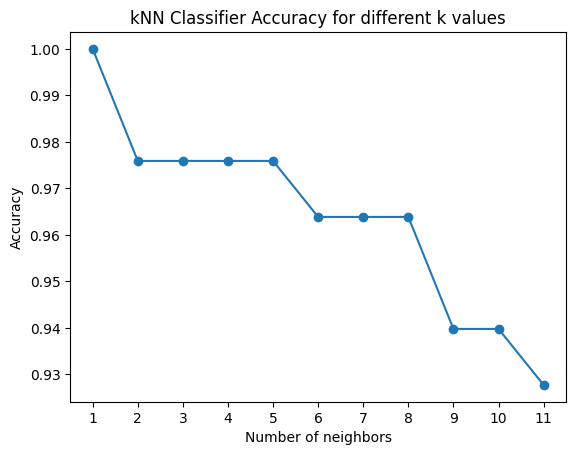

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = list(range(1, 12))
accuracies = []

# Training and predicting knn on train and test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting accuracy vs k
plt.plot(k_values, accuracies, marker='o')
plt.title("kNN Classifier Accuracy for different k values")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.show()


A9

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train kNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prediction behaviour of the train and test set
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Plot the confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix - Training data:")
print(cm_train)

print("\nConfusion Matrix - Test data:")
print(cm_test)

print("\nClassification Report - Training data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test data:")
print(classification_report(y_test, y_test_pred))


Confusion Matrix - Training data:
[[ 19   2]
 [  2 168]]

Confusion Matrix - Test data:
[[18  0]
 [ 2 63]]

Classification Report - Training data:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.99      0.99      0.99       170

    accuracy                           0.98       191
   macro avg       0.95      0.95      0.95       191
weighted avg       0.98      0.98      0.98       191


Classification Report - Test data:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.97      0.98        65

    accuracy                           0.98        83
   macro avg       0.95      0.98      0.97        83
weighted avg       0.98      0.98      0.98        83

